In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [23]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.21.5
1.4.2
3.5.1
0.11.2
1.0.2


In [24]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
col = ['petal_length','petal_width','species']
data = df.loc[:,col]
data.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [26]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
colx = ['petal_length','petal_width']
x = df.loc[:,colx]
x.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [33]:
label_to_num = {'setosa' : 0,
               'versicolor' : 1,
               'virginica' : 2}
y = df.loc[:,col[2]].map(label_to_num)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [34]:
from sklearn import svm

In [38]:
C = 0.001
clf = svm.SVC (kernel = 'linear', C = C)
clf.fit(x,y)

SVC(C=0.001, kernel='linear')

In [36]:
clf.predict([[6,2]])

/Users/priyabharti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

/Users/priyabharti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


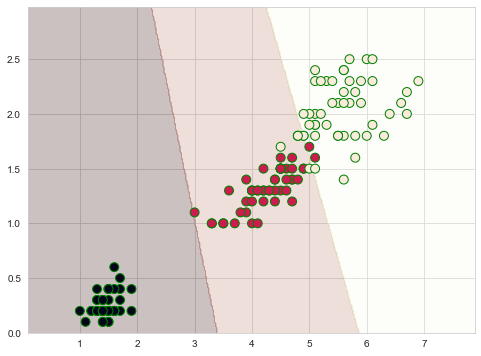

In [39]:
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() +1
ymin, ymax = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax,h), np.arange(ymin, ymax, h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx, yy, z, cmap = 'pink', alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 1, edgecolors = 'g')

avg accuracy:	0.9500
avg std:	0.0553


0

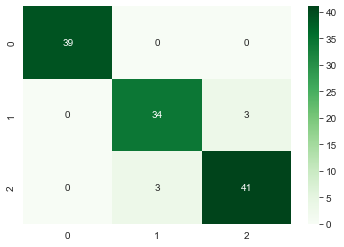

In [60]:
# Linear svm using train-test-split 
df =  sns.load_dataset('iris')

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

colx = ['petal_length', 'petal_width']

x = df.loc[:, colx] # get independent variable

label_to_num= {'setosa': 0,
                'versicolor' : 1,
                 'virginica' : 2}

y = df.loc[:, col[2]].map(label_to_num) # get dependent variable

x_train,x_test,y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state= 0) #perform

sc = StandardScaler() #  scale the x_train and x_test 
x_std_train = sc. fit_transform(x_train)
x_std_test = sc.fit_transform(x_test)

C = 1.0 # set hyperparameter 'C'

IModel = svm.SVC (kernel = 'linear', C = C) # instantiate model with kernel = 'Linear' 
IModel.fit(x_std_train,y_train) # fit the model

# cross validation to get avg accuracy and std

score = cross_val_score(IModel,x_std_train,y_train,cv =10, scoring = 'accuracy')
print("avg accuracy:\t{0:,.4f}".format(np.mean(score))) 
print("avg std:\t{0:,.4f}".format(np.std(score)))

y_pred = cross_val_predict(IModel,x_std_train,y_train,cv =3) # get prediction values for train data 

confusion_matrix(y_train,y_pred )# get CM for train data

sns.heatmap(confusion_matrix(y_train,y_pred), annot = True,cmap = 'Greens') # plot CM for train data 
0